In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df = pd.read_csv("Admission_Predict.csv")

In [4]:
#checking first 5 values
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
#checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [43]:
df.shape

(400, 9)

In [37]:
#splitting dataset
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [44]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=100)

In [45]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((320, 8), (80, 8), (320,), (80,))

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scale = MinMaxScaler()
train_x_scale = scale.fit_transform(train_x)
test_x_scale = scale.fit_transform(test_x)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()

In [47]:
model.add(Dense(8,activation='relu',input_dim=8))
model.add(Dense(1,activation='linear'))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='mse', optimizer='Adam')
hist = model.fit(train_x_scale,train_y,epochs=10, validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 1s 23ms/step - loss: 0.0738 - val_loss: 0.0731
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0681 - val_loss: 0.0680
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0633 - val_loss: 0.0627
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0606 - val_loss: 0.0605
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0583 - val_loss: 0.0590
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0564 - val_loss: 0.0570
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.0538
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0525 - val_loss: 0.0511
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0509 - val_loss: 0.0491


In [52]:
y_pred = model.predict(test_x_scale)

3/3 [==============================] - 0s 2ms/step


In [51]:
from sklearn.metrics import r2_score

In [53]:
r2_score(test_y,y_pred)

-2.041219744365545

In [79]:
model.add(Dense(3,activation='relu',input_dim=8))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
 dense_12 (Dense)            (None, 8)                 16        
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
 dense_15 (Dense)            (None, 8)                 16        
                                                                 
 dense_16 (Dense)            (None, 8)                

In [81]:
model.compile(loss='mse', optimizer='Adam')
hist = model.fit(train_x_scale,train_y,epochs=15, validation_split=0.2)

Epoch 1/15
8/8 [==============================] - 3s 30ms/step - loss: 0.3452 - val_loss: 0.2523
Epoch 2/15
8/8 [==============================] - 0s 5ms/step - loss: 0.2499 - val_loss: 0.1615
Epoch 3/15
8/8 [==============================] - 0s 5ms/step - loss: 0.1536 - val_loss: 0.0779
Epoch 4/15
8/8 [==============================] - 0s 7ms/step - loss: 0.0705 - val_loss: 0.0254
Epoch 5/15
8/8 [==============================] - 0s 7ms/step - loss: 0.0269 - val_loss: 0.0236
Epoch 6/15
8/8 [==============================] - 0s 6ms/step - loss: 0.0291 - val_loss: 0.0351
Epoch 7/15
8/8 [==============================] - 0s 7ms/step - loss: 0.0268 - val_loss: 0.0235
Epoch 8/15
8/8 [==============================] - 0s 7ms/step - loss: 0.0229 - val_loss: 0.0189
Epoch 9/15
8/8 [==============================] - 0s 10ms/step - loss: 0.0228 - val_loss: 0.0188
Epoch 10/15
8/8 [==============================] - 0s 10ms/step - loss: 0.0226 - val_loss: 0.0197
Epoch 11/15
8/8 [===================

In [82]:
y_pred_30 = model.predict(test_x_scale)

3/3 [==============================] - 0s 9ms/step


In [83]:
r2_score(test_y,y_pred_30)

-0.06967179206785978

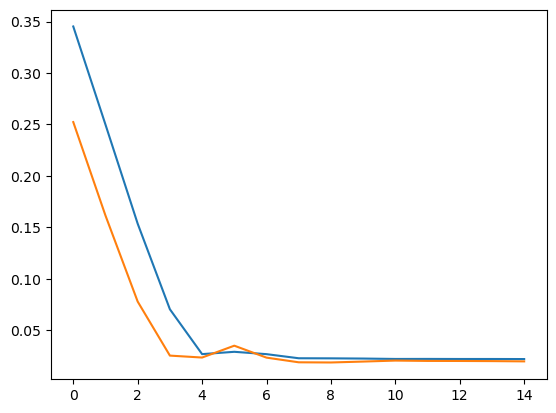

In [84]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()
        